# Author : Muhammad Tayyab
# Reg No : FA19-BCS-010
# Section: G2

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [39]:
df = pd.read_csv('/content/the-hello-dataset-fa22.csv')

### Cleaning Name & Gender Columns

In [67]:
df.loc[:, 'Name'] = df.Name.str.title()
df.loc[:, 'Gender'] = df.Gender.str.title()

### Cleaning HSSC-1 & HSSC-2 Columns 
* Keeping only first three digits.
* Dividing the number greater than total marks(550) by 2 to take average

In [68]:
df['HSSC-1'] = df['HSSC-1'].str.extract(r'(\d{3})')


df.loc[df['HSSC-1'].astype(float) >= 550, 'HSSC-1'] = df['HSSC-1'].astype(float) / 2

df['HSSC-2'] = df['HSSC-2'].str.extract(r'(\d{3})')
df.loc[df['HSSC-2'].astype(float) >= 550, 'HSSC-2'] = df['HSSC-2'].astype(float) / 2

print((df['HSSC-2'][59]))

377.5


### Cleaning CGPA Column
* Only keeping the values with format 3.33

In [69]:
df['CGPA'] = df['CGPA'].str.extract(r'(\d\.?\d?\d?)')

### Cleaning Birth Moth Column
* Replacing wrong spelling of a month with correct one
* Month number to corresponding month name  

In [70]:
df['BirthMonth'] = df.BirthMonth.str.strip()
df['BirthMonth'] = df.BirthMonth.str.title()
df['BirthMonth'] = df.BirthMonth.str.replace('Feburary', 'February')
df['BirthMonth'] = df.BirthMonth.str.replace('11', 'November')
df['BirthMonth'] = df.BirthMonth.str.replace('24/02/2001', 'February')

### Cleaning Weight Column
* Onlu keeping 3 digits of weight

In [71]:
df['Weight'] = df['Weight'].str.extract(r'(\d\d\d?)')

### Cleaning Favorite Color Column
* Removing spaces from start and end of color
* Capatalizing the color name

In [72]:
df['FavoriteColor'] = df['FavoriteColor'].str.strip()
df['FavoriteColor'] = df['FavoriteColor'].str.title()
df['FavoriteColor'].value_counts()

Black             46
Blue              24
Yellow            11
Red               10
Green              8
White              5
Pink               4
Navy Blue          4
Light Green        4
Orange             4
Peach              3
Purple             3
Dark Blue          3
Gray And Brown     2
Mustard            1
Brown              1
Grey               1
Name: FavoriteColor, dtype: int64

# Question

### Print the list of all students whose first name starts with letter the 'H'.

In [73]:
df[df['Name'].str[0].isin(['H'])].Name

9             Hamza Naveed
21             Habib Ullah
22            Hunain Javed
58    Hafiz Malahim Labib.
60     Hamna Tariq Saleemi
77                    Hina
78        Hamza Javed Khan
80          Husnain Ahmed 
93        Hamayoun Masroor
98           Hussain Afzal
Name: Name, dtype: object

### Print the total number of students who have a three words name (first-middle-surname).

In [74]:
print(len(df[df['Name'].str.count(r'[a-zA-Z]+ [a-zA-Z]+ [a-zA-Z]+$') == 1]))

35


### Print the percentage of students who have a CGPA of 3.0 or above.

In [75]:
print((len(df[df['CGPA'].astype(float) >= 3]) / len(df)) * 100)

28.35820895522388


### Plot a pie chart to show the ratio of male and female students.

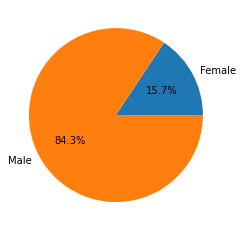

In [76]:
plt.pie(df.groupby(['Gender']).size(), labels = ['Female', 'Male'], autopct='%1.1f%%')
plt.show()

### Plot the CGPA of all male students on a histogram with intervals 2.0-2.5, 2.6-3.0, 3.1-3.5, 3.6-4.0.

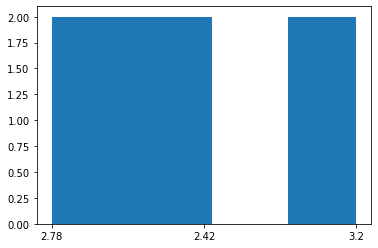

In [13]:
#histogram
#The given intervals are in inclusive form. I make them exclusive(1.95,2.55,3.05,3.55,4.05) but we start with 2 and end at 4.
MaleStudentRecord = df.loc[df["Gender"]=="Male"]

plt.hist(x = MaleStudentRecord.CGPA,bins=[2,2.55,3.05,3.55,4])
plt.show()

Plot the HSSC-1 marks of all male vs female students on a scatter plot.

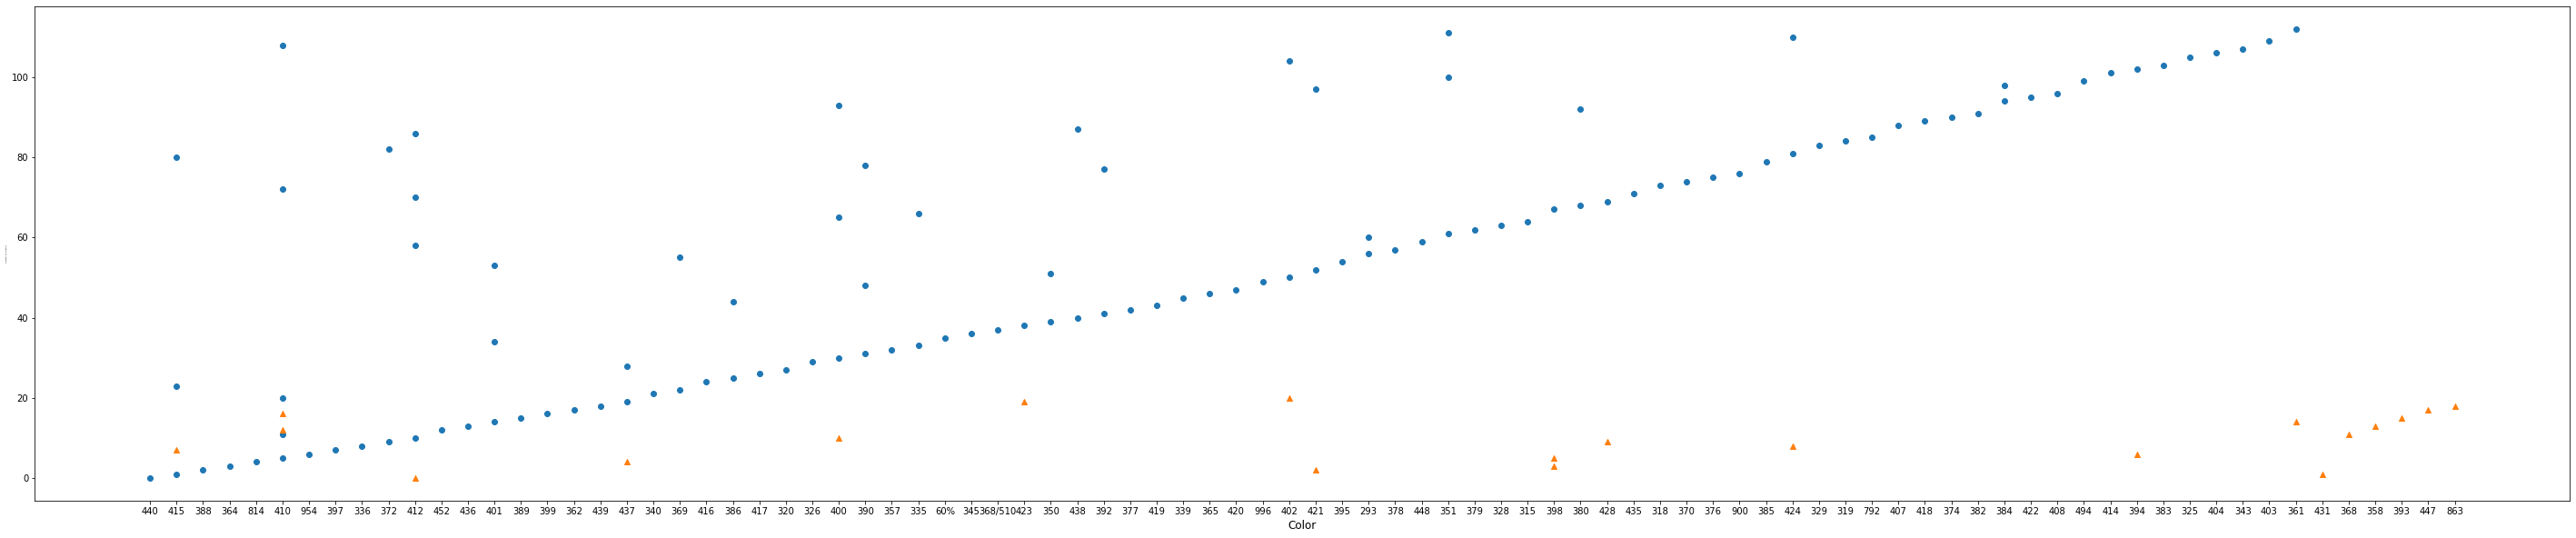

In [53]:
boys = (df.loc[df['Gender'] == 'Male'])['HSSC-1'].astype(str)
girls = (df.loc[df['Gender'] == 'Female'])['HSSC-1'].astype(str)

# print(len(boys))

f = plt.figure(figsize=(50, 10))

y = np.arange(0, len(boys))
plt.scatter(boys, y, marker='o')


y = np.arange(0, len(girls))
plt.scatter(girls,y, marker='^')


plt.xlabel('Color', fontsize=12)
plt.ylabel('Number of Students', fontsize=2)

plt.show()

### Plot the favorite colors of male vs female students on a bar chart.

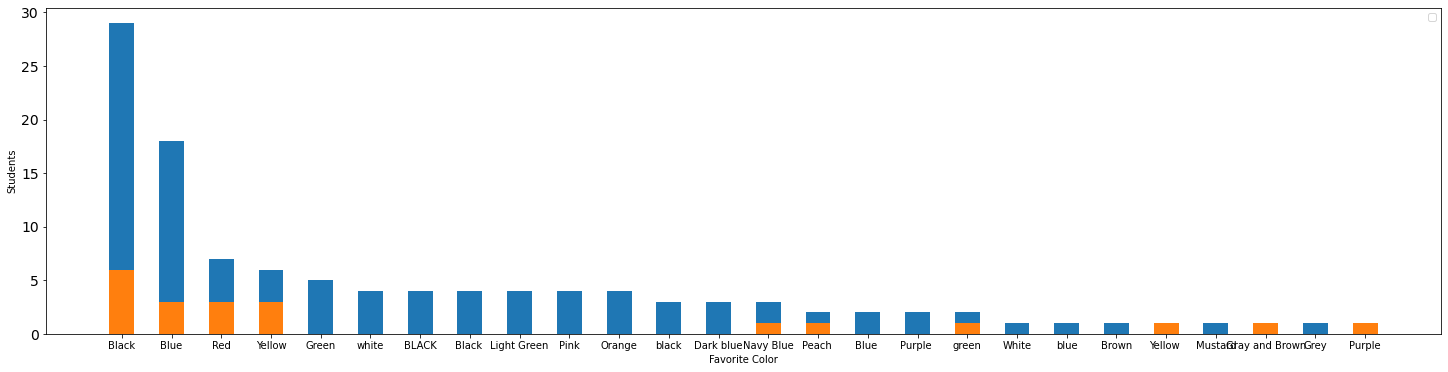

In [66]:
Boys = df.loc[df["Gender"]=="Male"]
Girls = df.loc[df["Gender"]=="Female"]


BoysColorsList=list(Boys.FavoriteColor.value_counts().index) 
boysCounterColor = list(Boys.FavoriteColor.value_counts().values)

GirlsColorsList=list(Girls.FavoriteColor.value_counts().index)
GirlsCounterColor = list(Girls.FavoriteColor.value_counts().values)

plt.figure(figsize = (25,6))
width = 0.5
plt.bar(BoysColorsList, boysCounterColor,width)
plt.bar(GirlsColorsList, GirlsCounterColor,width)
plt.xlabel("Favorite Color")
plt.ylabel("Students")
plt.legend()
plt.yticks(fontsize = 14)

plt.show()

• Plot line chart of students and their birth months.

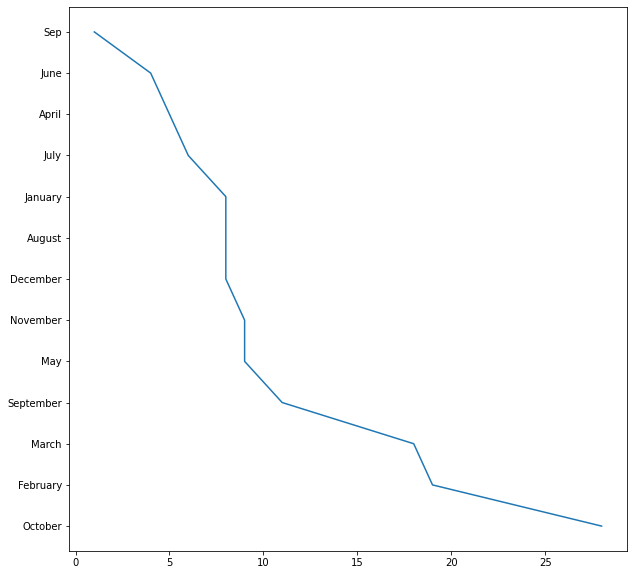

In [61]:
df['BirthMonth'].value_counts()
Months = list(df['BirthMonth'].value_counts().index)
StudentCountInMonth = list(df['BirthMonth'].value_counts().values)

plt.figure(figsize = (10,10))
plt.plot(StudentCountInMonth,Months)
plt.show()